# Question 7

## Fourier Transform

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import time
%matplotlib inline

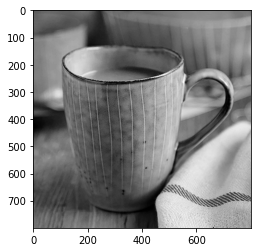

In [2]:
#Load image
cer = cv2.imread("images/ceramic.jpg",0)
plt.imshow(cer,cmap='gray')

In [3]:
print(cer)

[[ 91  91  91 ... 112 110 109]
 [ 91  91  91 ... 112 111 110]
 [ 91  91  91 ... 113 111 110]
 ...
 [121 118 119 ... 145 149 154]
 [122 118 120 ... 153 153 152]
 [122 118 120 ... 157 156 152]]


In [4]:
actualFFT = np.fft.fft2(cer)

### <b>Part 1</b>

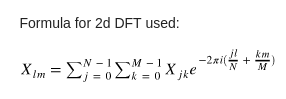

In [7]:
def DFT2D(a):
    aDFT = np.zeros((a.shape[0],a.shape[1]),dtype='complex64')
    rO = a.shape[0]
    cO = a.shape[1]
    for l in range(rO):
        for m in range(cO):
            for j in range(rO):
                for k in range(rO):
                    val = -2j*math.pi*((l*j)/rO+(k*m)/cO)
                    aDFT[l,m] = np.exp(val)
    return aDFT.astype('complex64')

### <b>Part 2</b>

![image.png](assets/FFT1D.png)

In [5]:
def FFT1D(a):
    if a.shape[0]==1:
        return a
    a_odd = a[1::2]
    a_even = a[::2]
    F_odd = FFT1D(a_odd)
    F_even = FFT1D(a_even)
    aFFT = np.zeros(a.shape[0],dtype='complex64')
    out = np.zeros(a.shape[0]//2,dtype='complex64')
    R = np.arange(a.shape[0]//2)
    out = np.exp(-2j*np.pi*R/a.shape[0])
#     out_odd = out*F_odd
#     print(aFFT[:a.shape[0]//2].shape)
#     print(np.array(F_even + out*F_odd).shape)
    aFFT[:a.shape[0]//2] = F_even + out*F_odd
    aFFT[a.shape[0]//2:] = F_even - out*F_odd
    return aFFT.astype('complex64')

In [6]:
def FFT2D(a):
    if a.shape[0]==1:
        return a
    flag1 = abs(np.log2(a.shape[0]) - int(np.log2(a.shape[0])))
    flag2 = abs(np.log2(a.shape[1]) - int(np.log2(a.shape[1])))
    #Row Case
    if flag1!=0:
        #Add zeros
        r_zero = np.zeros((int(2**(np.ceil(np.log2(a.shape[0]))))-a.shape[0],a.shape[1]))
        a = np.append(a,r_zero,axis=0)
    #Col Case
    if flag2!=0:
        #Add zeros
        c_zero = np.zeros((a.shape[0],int(2**(np.ceil(np.log2(a.shape[1]))))-a.shape[1]))
        a = np.append(a,c_zero,axis=1)
    
    out = np.zeros_like(a,dtype='complex64')
    #Row-Wise
    for i in range(a.shape[0]):
        out[i] = FFT1D(a[i])
    #Col-Wise
    for i in range(out.shape[1]):
        out[:,i] = FFT1D(out[:,i])

    return out

In [17]:
k_val = [1,2,3,4,5,6,7]
upgrade = np.zeros((7))
noob = np.zeros((7))
for k in range(len(k_val)):
    kk = k_val[k]
    cerI = cv2.resize(cer, (2**kk,2**kk), interpolation = cv2.INTER_AREA)
    initial = time.time()
    out = FFT2D(cerI)
    upgrade[k] += time.time() - initial 
    
    initial = time.time()
    out = DFT2D(cerI)
    noob[k] += time.time() - initial 

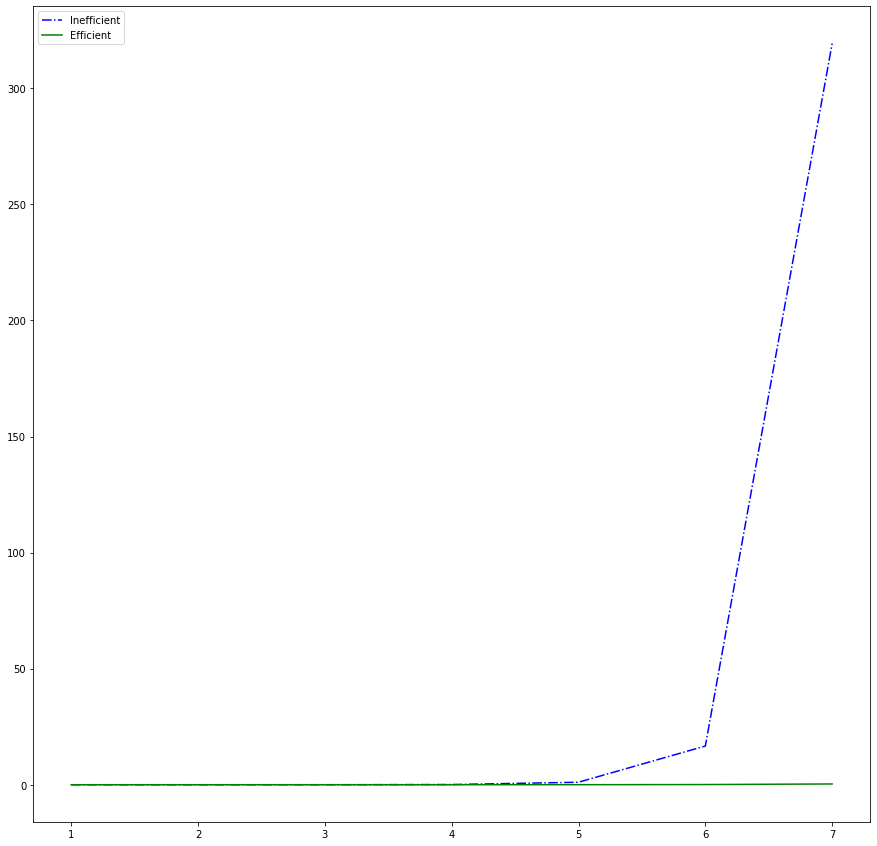

In [21]:
#Zoomed-in version
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(k_val,noob,'b-.')
plt.plot(k_val,upgrade,'g-')
plt.legend(['Inefficient','Efficient'])
plt.show()

In [7]:
out = FFT2D(cer)

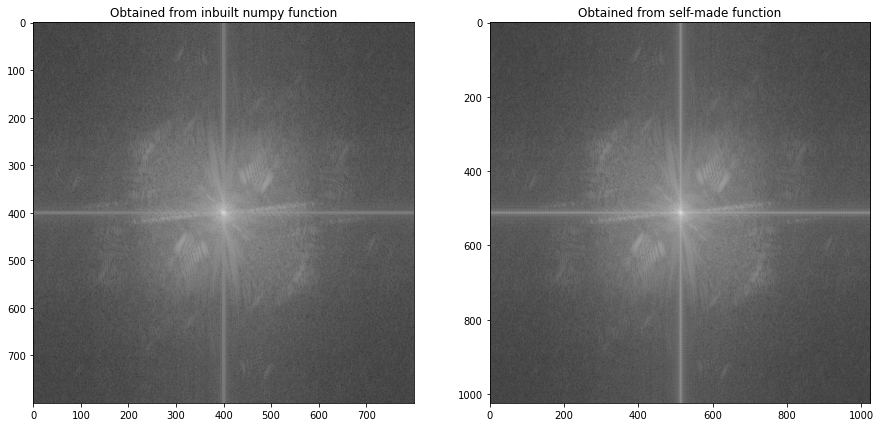

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(np.log(1 + np.abs(np.fft.fftshift(actualFFT))), cmap='gray')
axs[0].title.set_text("Obtained from inbuilt numpy function")
axs[1].imshow(np.log(1 + np.abs(np.fft.fftshift(out))), cmap='gray')
axs[1].title.set_text('Obtained from self-made function',)

### <b>Part 3</b>

![image.png](assets/InvFFT1D.png)

In [9]:
def InvFFT1D(x):
    s1 = x.copy()
    #Psedo-reverse 1 to N-1
    s1[1:] = s1[:0:-1]
    InvFFT1D = FFT1D(s1)/s1.shape[0]
    return InvFFT1D


In [10]:
A = np.array([2,4,5,2,6])
print(A[1:])
print(A[:0:-1])
A[1:] = A[:0:-1]
print(A)

[4 5 2 6]
[6 2 5 4]
[2 6 2 5 4]


In [11]:
def InvFFT2D(a):
    if a.shape[0]==1:
        return a
    out = np.zeros_like(a,dtype='complex64')
    #Row-Wise
    for i in range(a.shape[0]):
        out[i] = InvFFT1D(a[i])
    #Col-Wise
    for i in range(out.shape[1]):
        out[:,i] = InvFFT1D(out[:,i])
    Inv2D = np.real(out)
    return Inv2D

In [12]:
reGain = InvFFT2D(out)
reGain = reGain[:cer.shape[0],:cer.shape[1]]

Text(0.5, 1.0, 'Regained Output from doing inverse fourier transform')

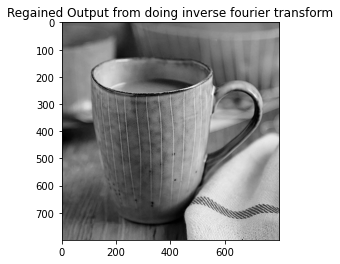

In [16]:
plt.imshow(np.rint(reGain),cmap='gray')
plt.title("Regained Output from doing inverse fourier transform")

On doing inverse fourier transform, we get the same input image

### <b>Part 4</b>

Text(0.5, 1.0, 'FFT of FFT of Image')

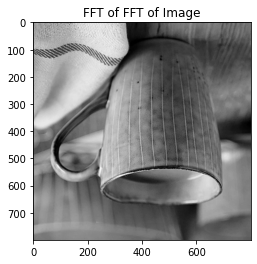

In [15]:
preFlip = FFT2D(out)
preFlip = preFlip[preFlip.shape[0]-cer.shape[0]:,preFlip.shape[1]-cer.shape[1]:]
plt.imshow(np.abs(preFlip),cmap='gray')
plt.title("FFT of FFT of Image")

We have obtained a flipped version of the input image. To solve this we actually reverse flip it in the frequency domain then do the FFT.

In [20]:
flipIt = np.flip(out, axis=(0, 1))
z = FFT2D(flipIt)
z = z[:cer.shape[0],:cer.shape[1]]

Text(0.5, 1.0, 'FFT of FFT of Original Image after flipping')

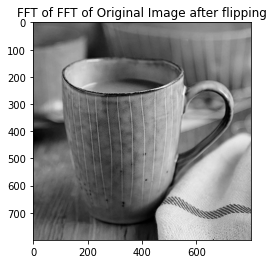

In [19]:
plt.imshow(np.abs(z),cmap='gray')
plt.title('FFT of FFT of Original Image after flipping')

We have again obtained the original input image despite taking the FFT of FFT